# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [1]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

# 資料準備

In [2]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169009152/169001437 [==============================] - 43s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [14]:
import matplotlib.pyplot as plt

def plot_image_with_label(images, labels, pred, idx, num = 10):
    fig = plt.gcf()
    fig.set_size_inches(8, 8)
    if num > 15: num = 15
    for i in range(0, num):
        ax = plt.subplot(5, 5, i+1)
        ax.imshow(images[idx], cmap='binary')
        title = 'class:' + str(labels[idx])
        if(len(pred) > 0):
            title += ' => ' + str(pred[idx])
        ax.set_title(title, fontsize = 10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx+=1
    plt.show()

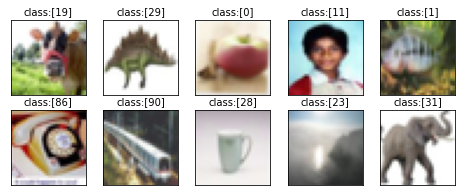

In [26]:
plot_image_with_label(x_train, y_train, [], 0)

In [16]:
x_test.shape

(10000, 32, 32, 3)

# Image normalize 

In [28]:
x_train[0][0][0]

array([255, 255, 255], dtype=uint8)

In [30]:
x_train_nor = x_train.astype('float32') / 255.0
x_test_nor = x_test.astype('float32') / 255.0

In [31]:
x_train_nor[0][0][0]

array([1., 1., 1.], dtype=float32)

# 轉換label 為OneHot Encoding

In [34]:
y_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [36]:
from keras.utils import np_utils

y_train_onehot = np_utils.to_categorical(y_train)
y_test_onthot = np_utils.to_categorical(y_test)


In [37]:
y_train_onehot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.